<a href="https://colab.research.google.com/github/MarinaSivodedova/classificalion_food/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    import pandas as pd
    import numpy as np
    import math
    import matplotlib.pyplot as plt
    import PIL.Image as Image
    import pathlib
    import os
    import tensorflow as tf
    import tensorflow_hub as hub
    from tensorflow import keras
    from keras.preprocessing import image
    from tensorflow.keras.utils import load_img
    from tensorflow.keras.utils import img_to_array
    from tensorflow.keras import layers
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Flatten
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train_dir = pathlib.Path('drive/MyDrive/FastFoodData/TrainingData')
train_image_paths = list(train_dir.glob('*/*.jpeg')) 
print(train_image_paths[:3])
# test_dir = pathlib.Path('./test')
# test_image_paths = list(test_dir.glob(r'*/*.jpg'))

valid_dir = pathlib.Path('drive/MyDrive/FastFoodData/ValidationData')
valid_image_paths = list(valid_dir.glob('*/*.jpeg'))
print(valid_image_paths[:5])

[PosixPath('drive/MyDrive/FastFoodData/TrainingData/Hot Dog/Hot Dog - Train (12).jpeg'), PosixPath('drive/MyDrive/FastFoodData/TrainingData/Hot Dog/Hot Dog - Train (1329).jpeg'), PosixPath('drive/MyDrive/FastFoodData/TrainingData/Hot Dog/Hot Dog - Train (132).jpeg')]
[PosixPath('drive/MyDrive/FastFoodData/ValidationData/Burger/Burger-Valid (296).jpeg'), PosixPath('drive/MyDrive/FastFoodData/ValidationData/Burger/Burger-Valid (134).jpeg'), PosixPath('drive/MyDrive/FastFoodData/ValidationData/Burger/Burger-Valid (331).jpeg'), PosixPath('drive/MyDrive/FastFoodData/ValidationData/Burger/Burger-Valid (166).jpeg'), PosixPath('drive/MyDrive/FastFoodData/ValidationData/Burger/Burger-Valid (122).jpeg')]


In [ ]:
fastfood_labels = []

for filename in os.listdir(valid_dir):
    labels = filename.split('/')[0]
    fastfood_labels.append(labels)


fastfood_labels


['Burger', 'Hot Dog', 'Donut', 'Pizza', 'Sandwich']

In [ ]:
print(len(fastfood_labels))
print(fastfood_labels[3])
print(fastfood_labels)

5
Pizza
['Burger', 'Hot Dog', 'Donut', 'Pizza', 'Sandwich']


In [ ]:
#Обработка изображений
def image_processing(filepath):
    
    
    labels = [str(filepath[i]).split('/')[4] for i in range(len(filepath))]
    labels = fastfood_labels
    
    filepath = pd.Series(filepath, name = 'Filepath').astype(str)
    labels = pd.Series(labels, name = 'Label')
    
    df = pd.concat([filepath, labels], axis='columns')
    return df


In [ ]:
train_df = image_processing(train_image_paths)
# test_df = image_processing(test_image_paths)
val_df = image_processing(valid_image_paths)
train_df
val_df

,Filepath,Label
0,drive/MyDrive/FastFoodData/ValidationData/Burg...,Burger
1,drive/MyDrive/FastFoodData/ValidationData/Burg...,Hot Dog
2,drive/MyDrive/FastFoodData/ValidationData/Burg...,Donut
3,drive/MyDrive/FastFoodData/ValidationData/Burg...,Pizza
4,drive/MyDrive/FastFoodData/ValidationData/Burg...,Sandwich
...,...,...
2492,drive/MyDrive/FastFoodData/ValidationData/Sand...,NaN
2493,drive/MyDrive/FastFoodData/ValidationData/Sand...,NaN
2494,drive/MyDrive/FastFoodData/ValidationData/Sand...,NaN
2495,drive/MyDrive/FastFoodData/ValidationData/Sand...,NaN


In [ ]:
# Create DataFrame with just one label for each sport
df_unique = train_df.copy().drop_duplicates(subset=['Label']).reset_index()

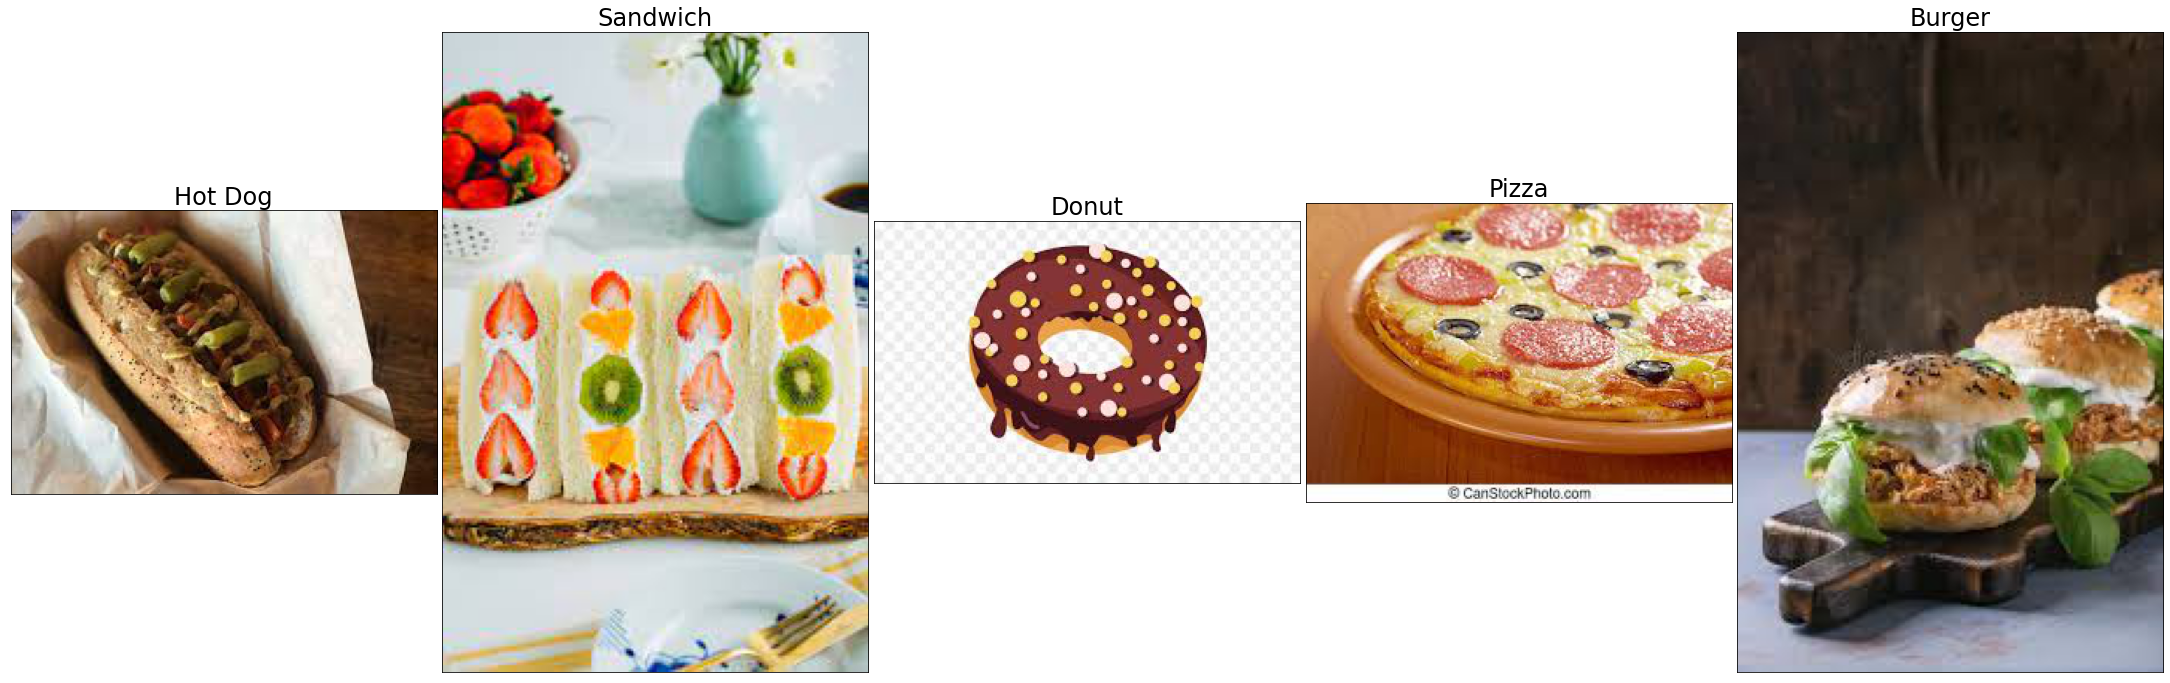

In [ ]:
# Display some sport pictures
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 10),
                        subplot_kw={'xticks': [], 'yticks': []})


for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 24)
plt.tight_layout(pad=0.2)
plt.show()




In [ ]:


train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe  = train_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 0,
    rotation_range = 30,
    zoom_range = 0.15,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.15,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

TypeError: ignored

In [ ]:
val_images = train_generator.flow_from_dataframe(
    dataframe  = val_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 0,
    rotation_range = 30,
    zoom_range = 0.15,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.15,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

TypeError: ignored

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
input_shape= (224, 224, 3),
include_top = False,
weights = 'imagenet',
pooling = 'avg'
)
pretrained_model.trainable = False

In [ ]:

model = Sequential([
    pretrained_model,
    tf.keras.layers.Dense(45, activation = 'relu'),
    tf.keras.layers.Dense(40, activation = 'relu'),
    tf.keras.layers.Dense(35, activation = 'relu'),
    tf.keras.layers.Dense(30, activation = 'relu'),
    tf.keras.layers.Dense(25, activation = 'relu'),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'softmax'),

])




model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)



history = model.fit(
    train_images,
    validation_data = val_images,
    batch_size = 15,
    epochs = 1,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 5,
            restore_best_weights = True
        )
        
    ]
)
model.save('vgg_face1.h5')


228/228 [==============================] - 2084s 9s/step - loss: 0.6186 - accuracy: 0.7828 - val_loss: 0.4638 - val_accuracy: 0.8374


In [ ]:
def output(imagepath):
    img = load_img(imagepath, target_size=(224, 224, 3))
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, [0])
    answer = model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [ ]:
img = output('/content/drive/MyDrive/FastFoodData/ValidationData/Burger/Burger-Valid (10).jpeg')
img

1/1 [==============================] - 0s 65ms/step


'S'

In [ ]:

batch_size = 64
img_height = 224
img_width = 224


# Keras data loader
# training, validation and test set
TRAIN_PATH = pathlib.Path("./train")
VAL_PATH = pathlib.Path("./valid")
TEST_PATH = pathlib.Path("./test")

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_PATH,
    image_size=(img_height, img_width),
    batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_PATH,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 13572 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


In [ ]:
class_names = val_ds.class_names
images = test_ds.take(1)

class_names

['air hockey',
 'ampute football',
 'archery',
 'arm wrestling',
 'axe throwing',
 'balance beam',
 'barell racing',
 'baseball',
 'basketball',
 'baton twirling',
 'bike polo',
 'billiards',
 'bmx',
 'bobsled',
 'bowling',
 'boxing',
 'bull riding',
 'bungee jumping',
 'canoe slamon',
 'cheerleading',
 'chuckwagon racing',
 'cricket',
 'croquet',
 'curling',
 'disc golf',
 'fencing',
 'field hockey',
 'figure skating men',
 'figure skating pairs',
 'figure skating women',
 'fly fishing',
 'football',
 'formula 1 racing',
 'frisbee',
 'gaga',
 'giant slalom',
 'golf',
 'hammer throw',
 'hang gliding',
 'harness racing',
 'high jump',
 'hockey',
 'horse jumping',
 'horse racing',
 'horseshoe pitching',
 'hurdles',
 'hydroplane racing',
 'ice climbing',
 'ice yachting',
 'jai alai',
 'javelin',
 'jousting',
 'judo',
 'lacrosse',
 'log rolling',
 'luge',
 'motorcycle racing',
 'mushing',
 'nascar racing',
 'olympic wrestling',
 'parallel bar',
 'pole climbing',
 'pole dancing',
 'pole vau

MaxPooling - операция максимальной подвыборки

In [ ]:
model1 = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(100)
])

# setting hyperparameters
model1.compile(optimizer='adam', # set the optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss function
    metrics=['accuracy']) #accuracy metric
history = model1.fit(train_ds,epochs=10, validation_data=val_ds)
print("PERFOMANCE",model1.evaluate(test_ds))
model1.summary()

Epoch 1/10
  1/136 [..............................] - ETA: 1:32:29 - loss: 4.6042 - accuracy: 0.0300

KeyboardInterrupt: 

In [ ]:

def output(imagepath):
    img = load_img(imagepath, target_size=(224, 224, 3))
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    answer = model1.predict(img)
    # y_class = np.argmax(answer)
    # np.argmax(answer)
    # y = " ".join(str(x) for x in y_class)
    # y = int(y)
    prediction = np.argmax(answer)
    
    
    return prediction

In [ ]:
img = output('./test/boxing/2.jpg')
img

1/1 [==============================] - 0s 164ms/step


46